# Flow Plot Example

Here, we are going to import a network and plot the electricity flow

In [101]:
import pypsa, os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
plt.rc("figure", figsize=(10,8))

#### Import and optimize a network

In [52]:
#n = pypsa.Network('/mnt/c/Users/scl38887/Documents/git/PyPSA/examples/notebooks/flow-plot.ipynb')
n = pypsa.examples.ac_dc_meshed(from_master=True)
n.lopf()


Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 17, 1].

INFO:pypsa.io:Imported network ac-dc-meshed.nc has buses, carriers, generators, global_constraints, lines, links, loads
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using glpk
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -3474256.04054994
  Upper bound: -3474256.04054994
  Number of objectives: 1
  Number of constraints: 452
  Number of variables: 188
  Number of nonzeros: 991
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.03093552589416504
# ----------------------------------------------------------
#   Solution Information
# -------

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

Get mean generator power by bus and carrier

In [53]:
gen = n.generators.assign(g = n.generators_t.p.mean()).groupby(['bus', 'carrier']).g.sum()

Plot the electricty flows

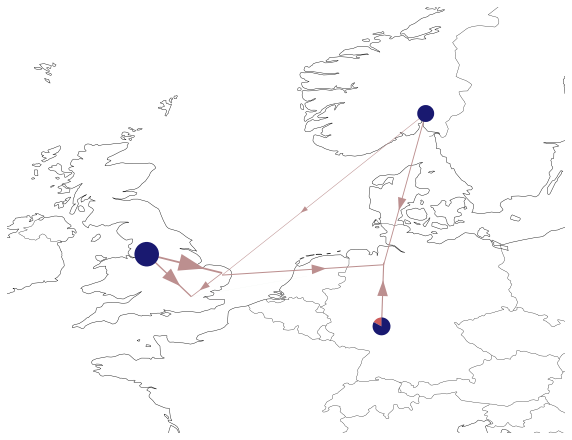

In [109]:
# links are not displayed for prettier output ('link_widths=0')
n.plot(bus_sizes=gen/5e3,
       bus_colors={'gas':'indianred', 'wind':'midnightblue'},
       margin=.5,
       flow='mean',
       line_widths=0.1,
       link_widths=0
       )
plt.show()

Plot the electricity flows with different projection and geomap color

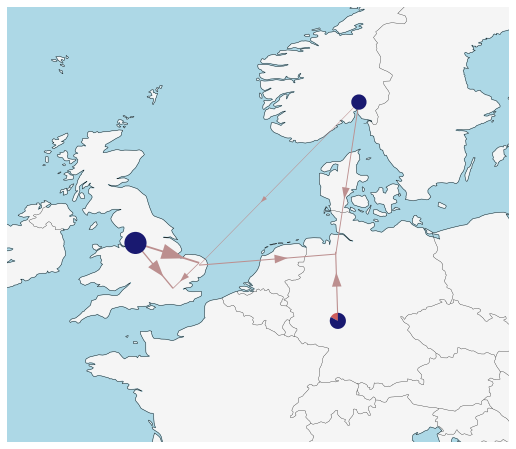

In [110]:
# links are not displayed for prettier output ('link_widths=0')
n.plot(bus_sizes=gen/5e3,
       bus_colors={'gas':'indianred', 'wind':'midnightblue'},
       margin=.5,
       flow='mean',
       line_widths=0.1,
       link_widths=0,
       projection=ccrs.EqualEarth(),
       color_geomap=True,
       )
plt.show()

Set arbitary values as flow argument using the MultiIndex of n.branches()

In [77]:
flow = pd.Series(10, index=n.branches().index)

In [79]:
flow

component  name             
Link       Norwich Converter    10
           Norway Converter     10
           Bremen Converter     10
           DC link              10
Line       0                    10
           1                    10
           2                    10
           3                    10
           4                    10
           5                    10
           6                    10
dtype: int64

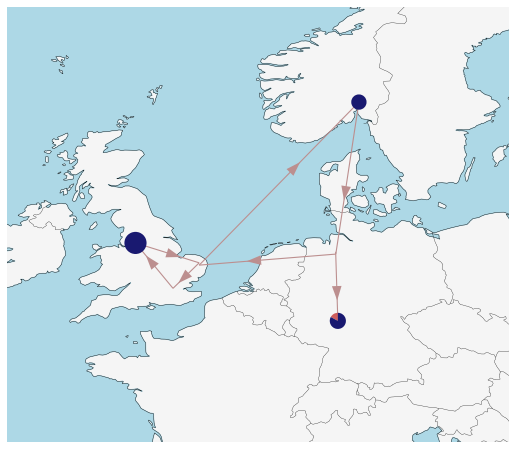

In [114]:
# links are not displayed for prettier output ('link_widths=0')
n.plot(bus_sizes=gen/5e3,
       bus_colors={'gas':'indianred', 'wind':'midnightblue'},
       margin=.5,
       flow=flow,
       line_widths=2.7,
       link_widths=0,
       projection=ccrs.EqualEarth(),
       color_geomap=True,
       )
plt.show()

Adjust link colors according to their mean load

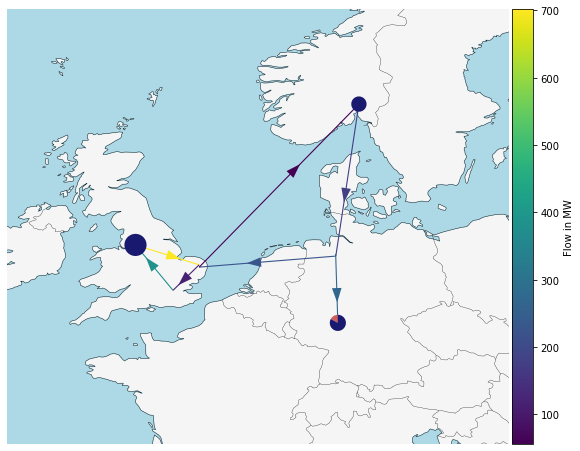

In [115]:
# Pandas series with MultiIndex
# links are not displayed for prettier output ('link_widths=0')
collection = n.plot(bus_sizes=gen/5e3,
       bus_colors={'gas':'indianred', 'wind':'midnightblue'},
       margin=.5,
       flow=flow,
       line_widths=2.7,
       link_widths=0,
       projection=ccrs.EqualEarth(),
       color_geomap=True,
       line_colors=n.lines_t.p0.mean().abs(),
       )

plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()